In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Feb 24 15:36:52 2019

@author: OasisR
"""
from datetime import datetime
import numpy as np
import pandas as pd
# from scipy import interpolate
import time
import matplotlib.pyplot as plt

In [2]:
'''
    期权论坛的设定
    如果以后访问失败了，需要修改这一部分
'''

# 论坛地址
url_forum = 'https://optbbs.com/'
url_forum_data = 'https://1.optbbs.com/d/csv/d/'

# 期权k线
url_vixk = 'vixk.csv'


In [3]:
def timestamp_to_strtime(timestamp):
    """将 13 位整数的毫秒时间戳转化成本地普通时间 (字符串格式)
    以第一个数据为例，这里我们知道期权论坛上的数据是从2015-02-09开始的
    :param timestamp: 13 位整数的毫秒时间戳 (1423440000000)
    :return: 返回字符串格式 {str}'2015-02-09 08:00:00.000000'
    """
#     local_str_time = datetime.fromtimestamp(timestamp / 1000.0).strftime('%Y-%m-%d %H:%M:%S.%f')
#     但实际上只需要保留到日
    local_str_time = datetime.fromtimestamp(timestamp / 1000.0).strftime('%Y-%m-%d')
    return local_str_time

# 数据存到本地之后尽量不要再运行下一个模块

In [4]:
'''
将期权论坛上的数据存到本地

'''

# 不知道有没有访问限制，也没加访问头，此时sleep比较稳妥
time.sleep(10)
data_forum = pd.read_csv(url_forum_data+url_vixk, encoding='GBK')

## 给出每次运行时当日日期
print ('本次运行日期：'+time.strftime("%Y/%m/%d"))
date = time.strftime("%Y%m%d")

# 存到本地之后尽量不要再运行此模块
data_forum.to_csv("./raw_data/"+date+".csv", encoding ='utf_8_sig')
print('数据存到本地之后尽量不要再运行此模块')

本次运行日期：2019/03/20
数据存到本地之后尽量不要再运行此模块


In [5]:
# python3之后返回的是迭代器
real_date = list(map(timestamp_to_strtime, data_forum['1'].tolist()))
c ={'Date':real_date}
c = pd.DataFrame(data=c)

# 必须加axis=1
newData = pd.concat([data_forum,c], axis=1)
date_tickers=newData['Date'].values

newData=newData[['Date','2','5','3','4']]

In [10]:
newData.to_csv("./working_data/qvix"+date+".csv", encoding ='utf_8_sig')

In [11]:
# 导入两个涉及的库 
from matplotlib.pylab import date2num 
import datetime # 对tushare获取到的数据转换成candlestick_ohlc()方法可读取的格式 


def date_to_num(dates): 
    num_time = [] 
    for date in dates: 
        date_time = datetime.datetime.strptime(date,'%Y-%m-%d') 
        num_date = date2num(date_time) 
        num_time.append(num_date) 
    return num_time # dataframe转换为二维数组 
mat_wdyx = newData.as_matrix() 
num_time = date_to_num(mat_wdyx[:,0]) 
mat_wdyx[:,0] = num_time 
#         日期,   开盘,     收盘,    最高,      最低,   成交量,    代码 


c:\users\linke\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]


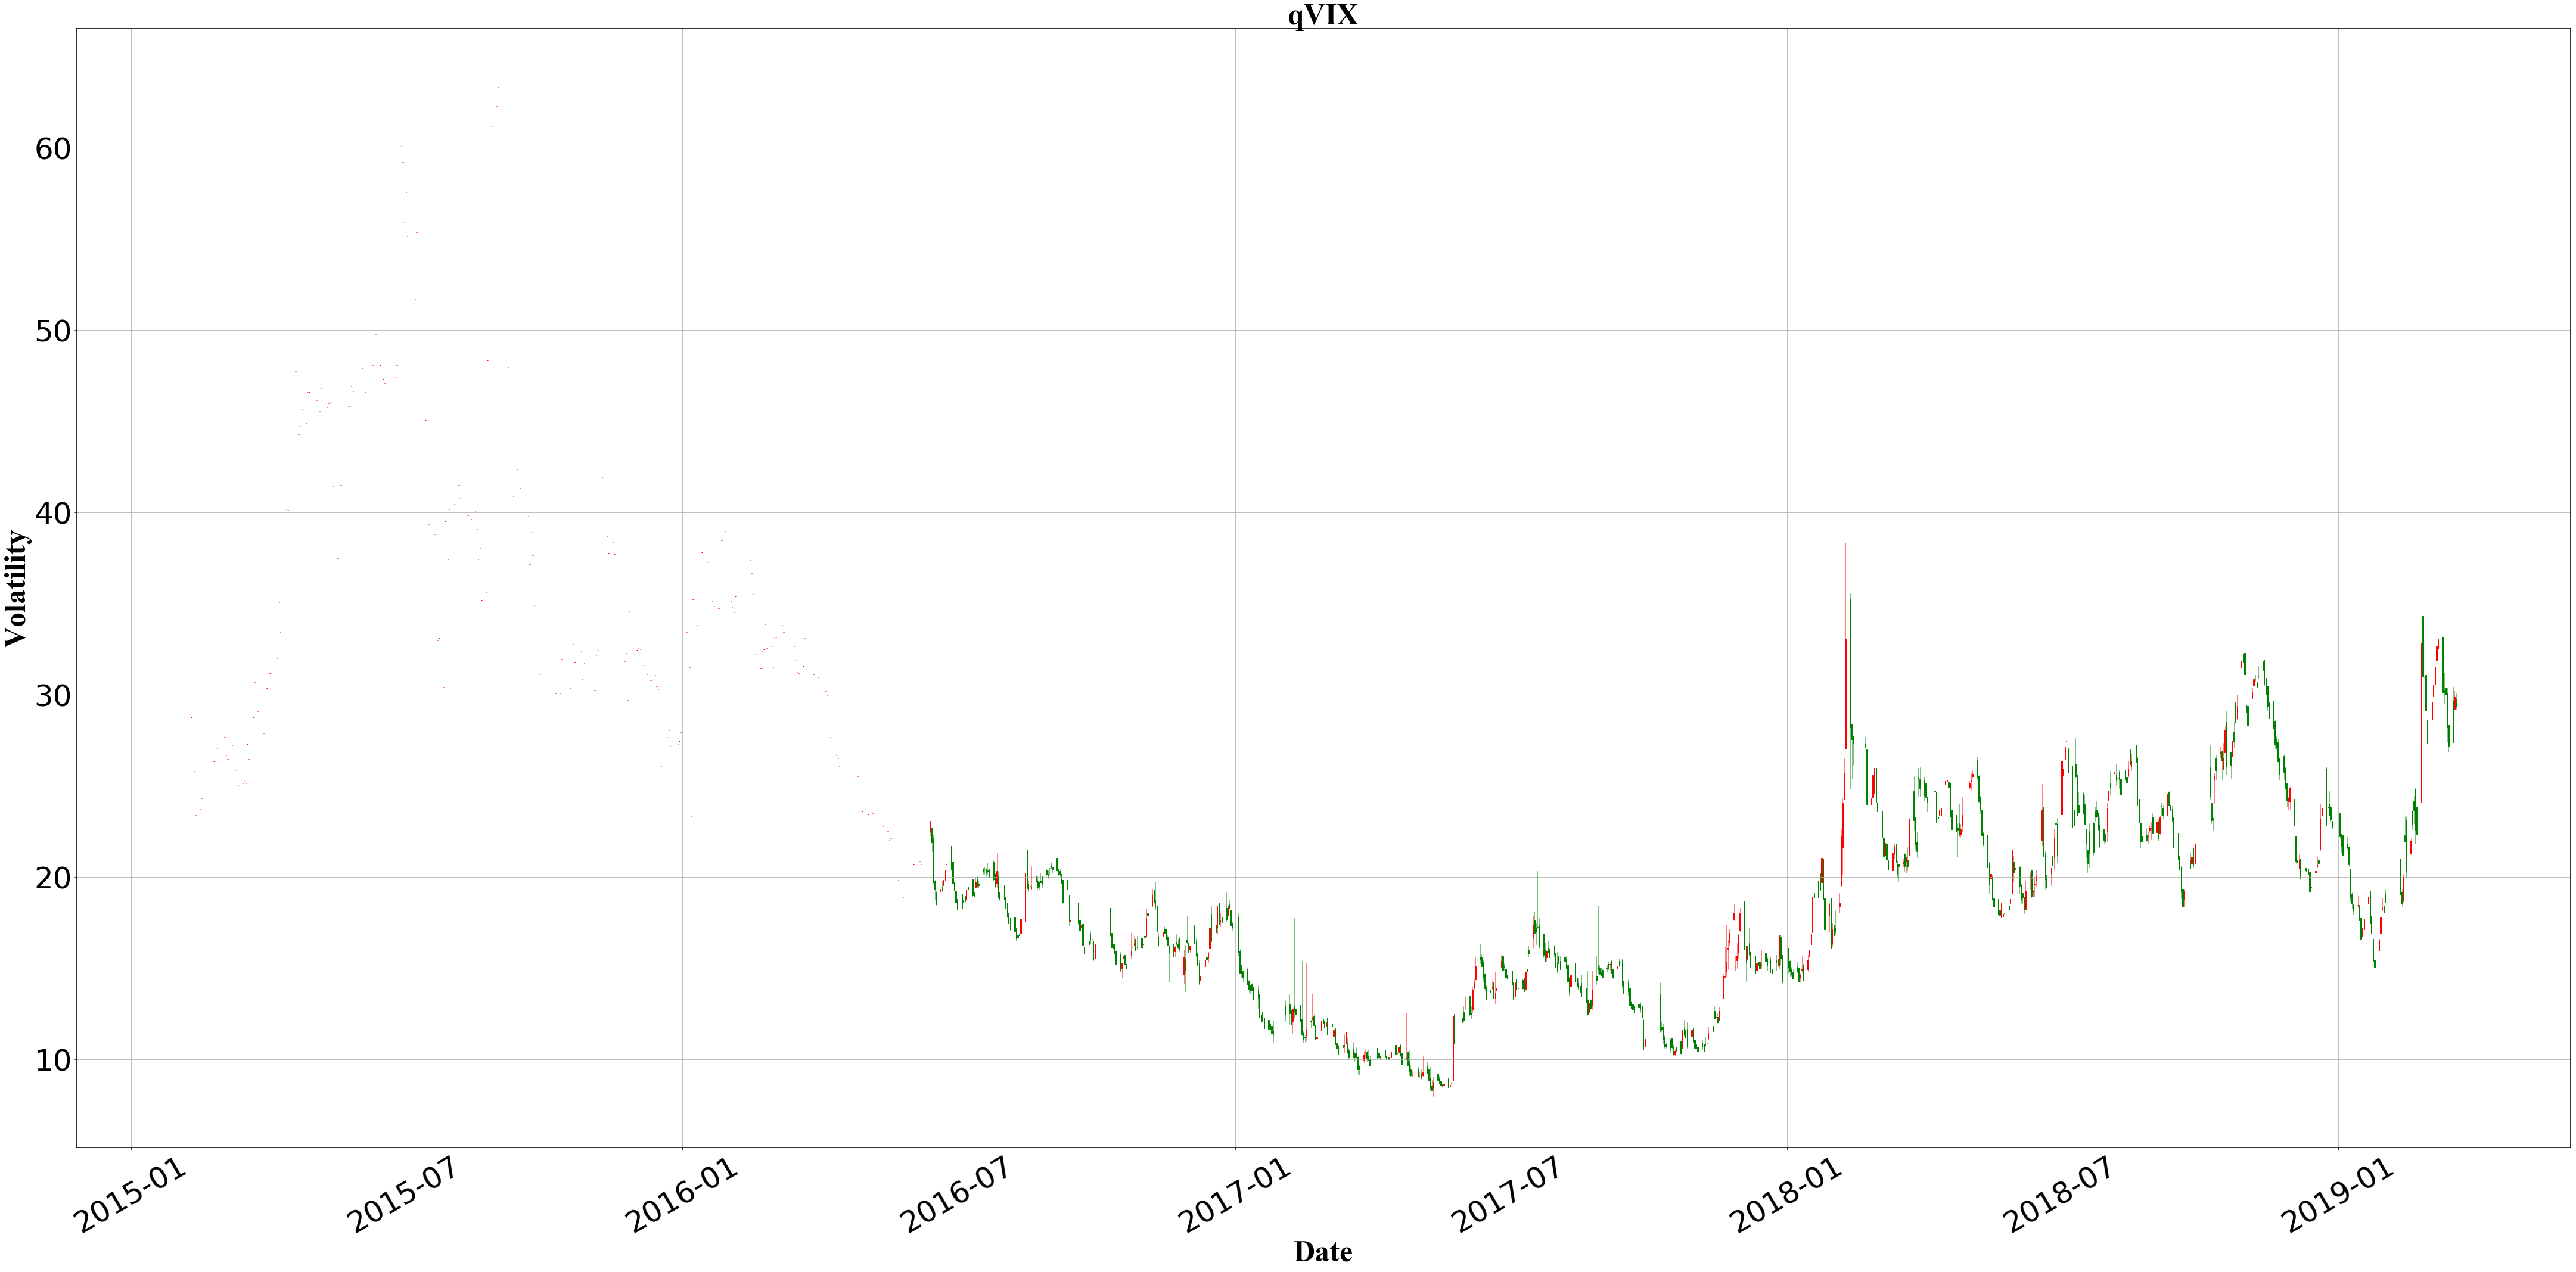

In [12]:
# 画图 for all

import mpl_finance as mpf

fig, ax = plt.subplots(figsize=(75,45)) 
fig.subplots_adjust(bottom=0.3) 
mpf.candlestick_ochl(ax, mat_wdyx, width=0.5, colorup='r', colordown='g', alpha=1.0) 
plt.grid(True)
plt.xticks(rotation=30) 


font = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 50,
}

plt.title('qVIX', font) 
plt.xlabel('Date', font) 
plt.ylabel('Volatility', font)
ax.xaxis_date ()



for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(50)

for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(50)
    
    
plt.savefig('./figure/qvix最新结果至'+date+'.png')

c:\users\linke\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


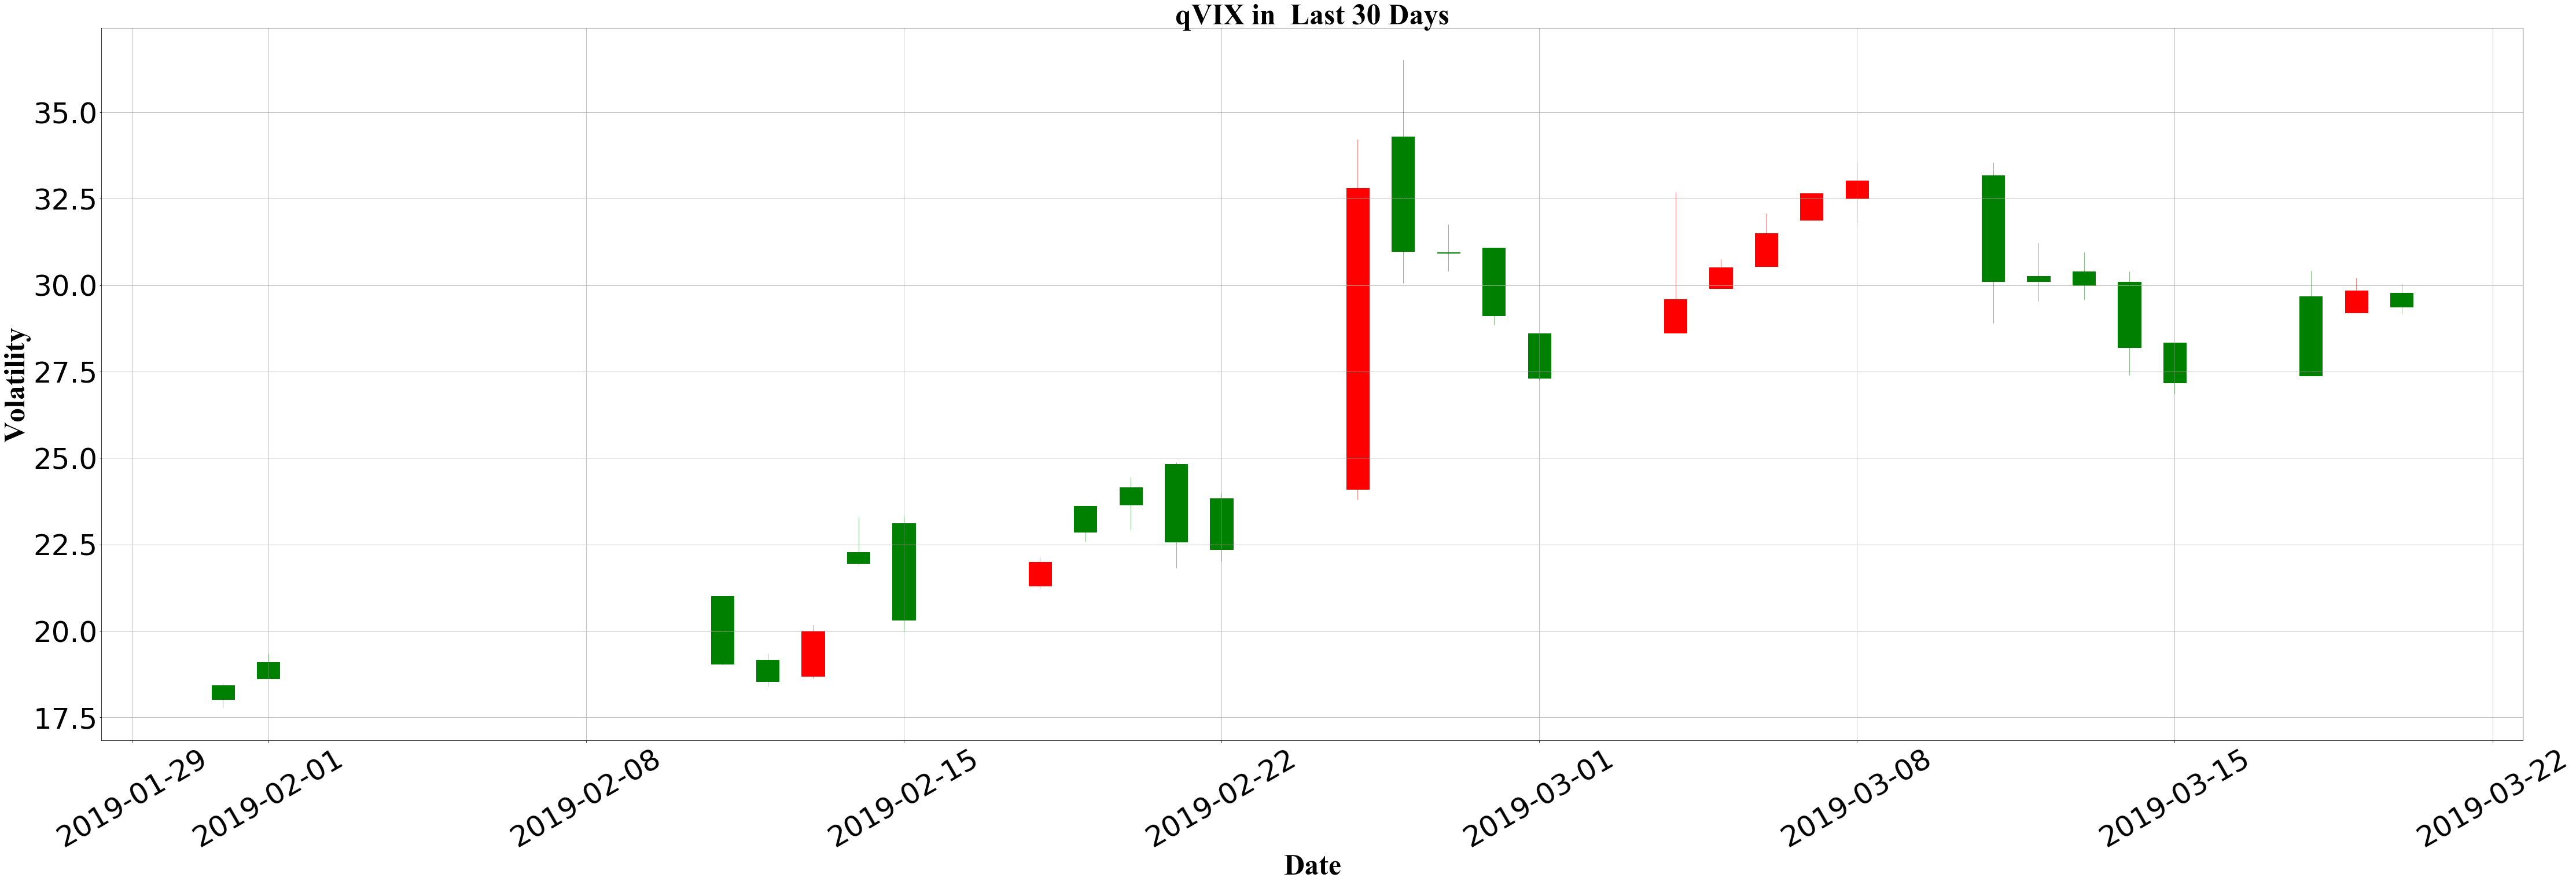

In [13]:
# 最近30天的VIX


lastMonth = newData[-30:]
mat_wdyx30 = lastMonth.as_matrix() 
num_time = date_to_num(mat_wdyx30[:,0]) 
mat_wdyx30[:,0] = num_time 

fig, ax = plt.subplots(figsize=(75,45)) 
fig.subplots_adjust(bottom=0.5) 
mpf.candlestick_ochl(ax, mat_wdyx30, width=0.5, colorup='r', colordown='g', alpha=1.0) 

font = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 50,
}

plt.grid(True)
plt.xticks(rotation=30) 
plt.title('qVIX in  Last 30 Days', font) 
plt.xlabel('Date', font) 
plt.ylabel('Volatility', font)

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(50)
    
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(50)
    
ax.xaxis_date ()
plt.savefig('./figure/最近30天最新结果至'+date+'.png')